# Incidents dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import HeatMap
import matplotlib.colors as mcolors

In [3]:
filepath = r"C:/Users/clara/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/MTA_Subway_Major_Incidents__Beginning_2020_20250429.csv"
df = pd.read_csv(filepath)

In [4]:
print(df.columns)
print(df.head())

Index(['month', 'division', 'line', 'day_type', 'category', 'count'], dtype='object')
        month    division line  day_type                            category  \
0  2024-12-01  A DIVISION    1         1                               Other   
1  2024-12-01  A DIVISION    1         1  Persons on Trackbed/Police/Medical   
2  2024-12-01  A DIVISION    1         1                             Signals   
3  2024-12-01  A DIVISION    2         1                          Subway Car   
4  2024-12-01  A DIVISION    2         1                             Signals   

   count  
0      1  
1      1  
2      2  
3      1  
4      3  


In [5]:
# Parse 'month' as datetime
df['month'] = pd.to_datetime(df['month'])

# Group by 'month' and sum the 'count'
monthly_incidents = df.groupby('month')['count'].sum().reset_index()

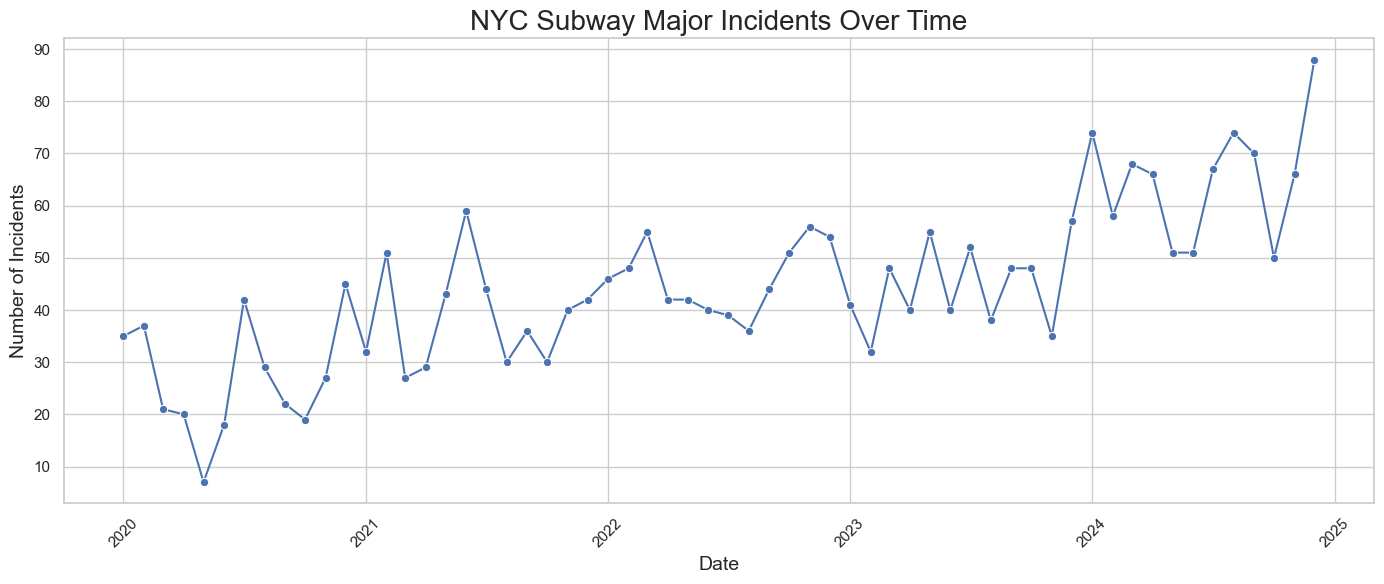

In [6]:
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_incidents, x='month', y='count', marker="o")
plt.title('NYC Subway Major Incidents Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

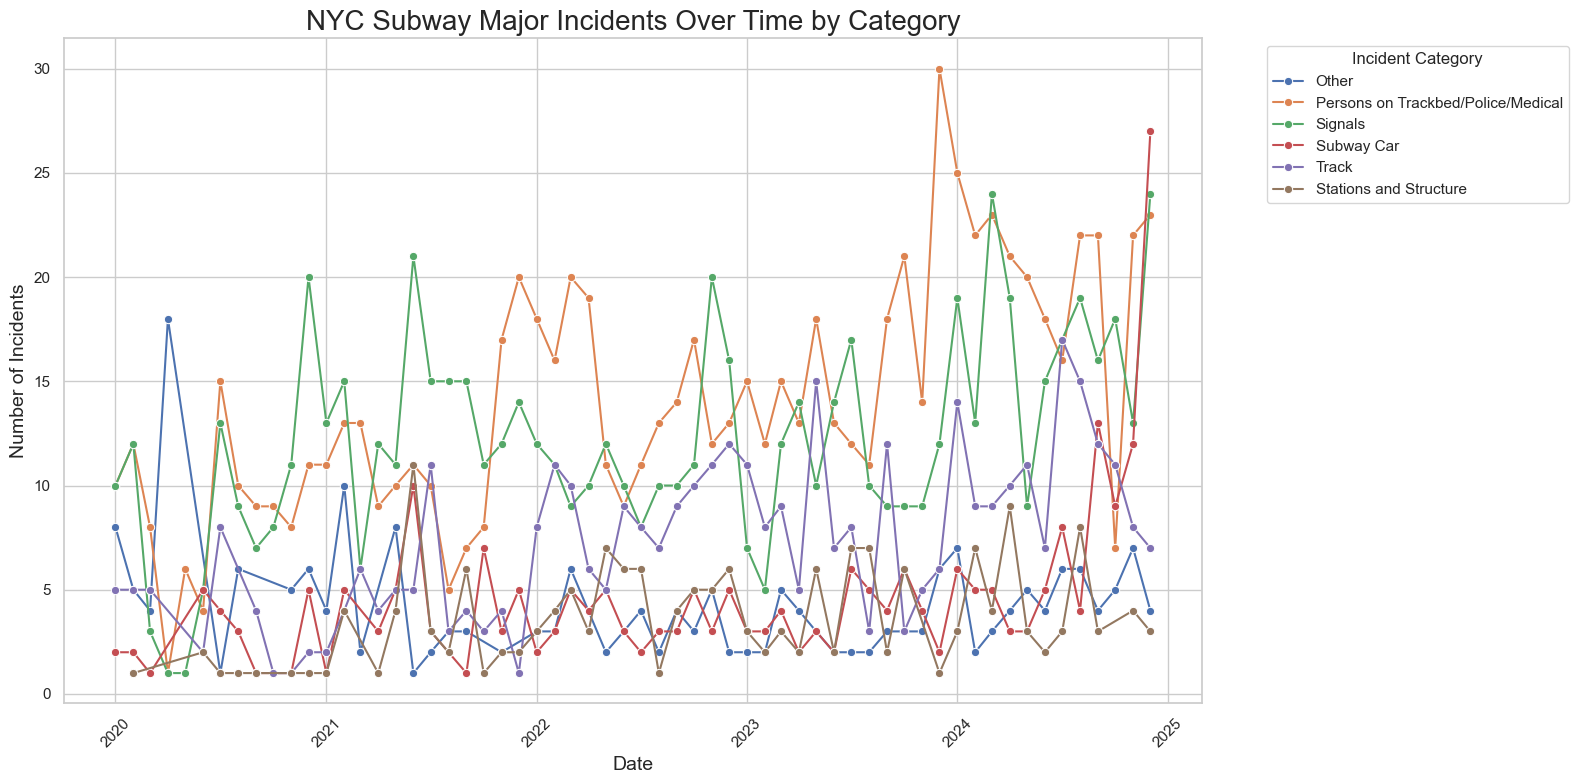

In [7]:
# Group by both 'month' and 'category', then sum counts
monthly_category = df.groupby(['month', 'category'])['count'].sum().reset_index()

# Plot
plt.figure(figsize=(16,8))
sns.lineplot(data=monthly_category, x='month', y='count', hue='category', marker="o")

plt.title('NYC Subway Major Incidents Over Time by Category', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


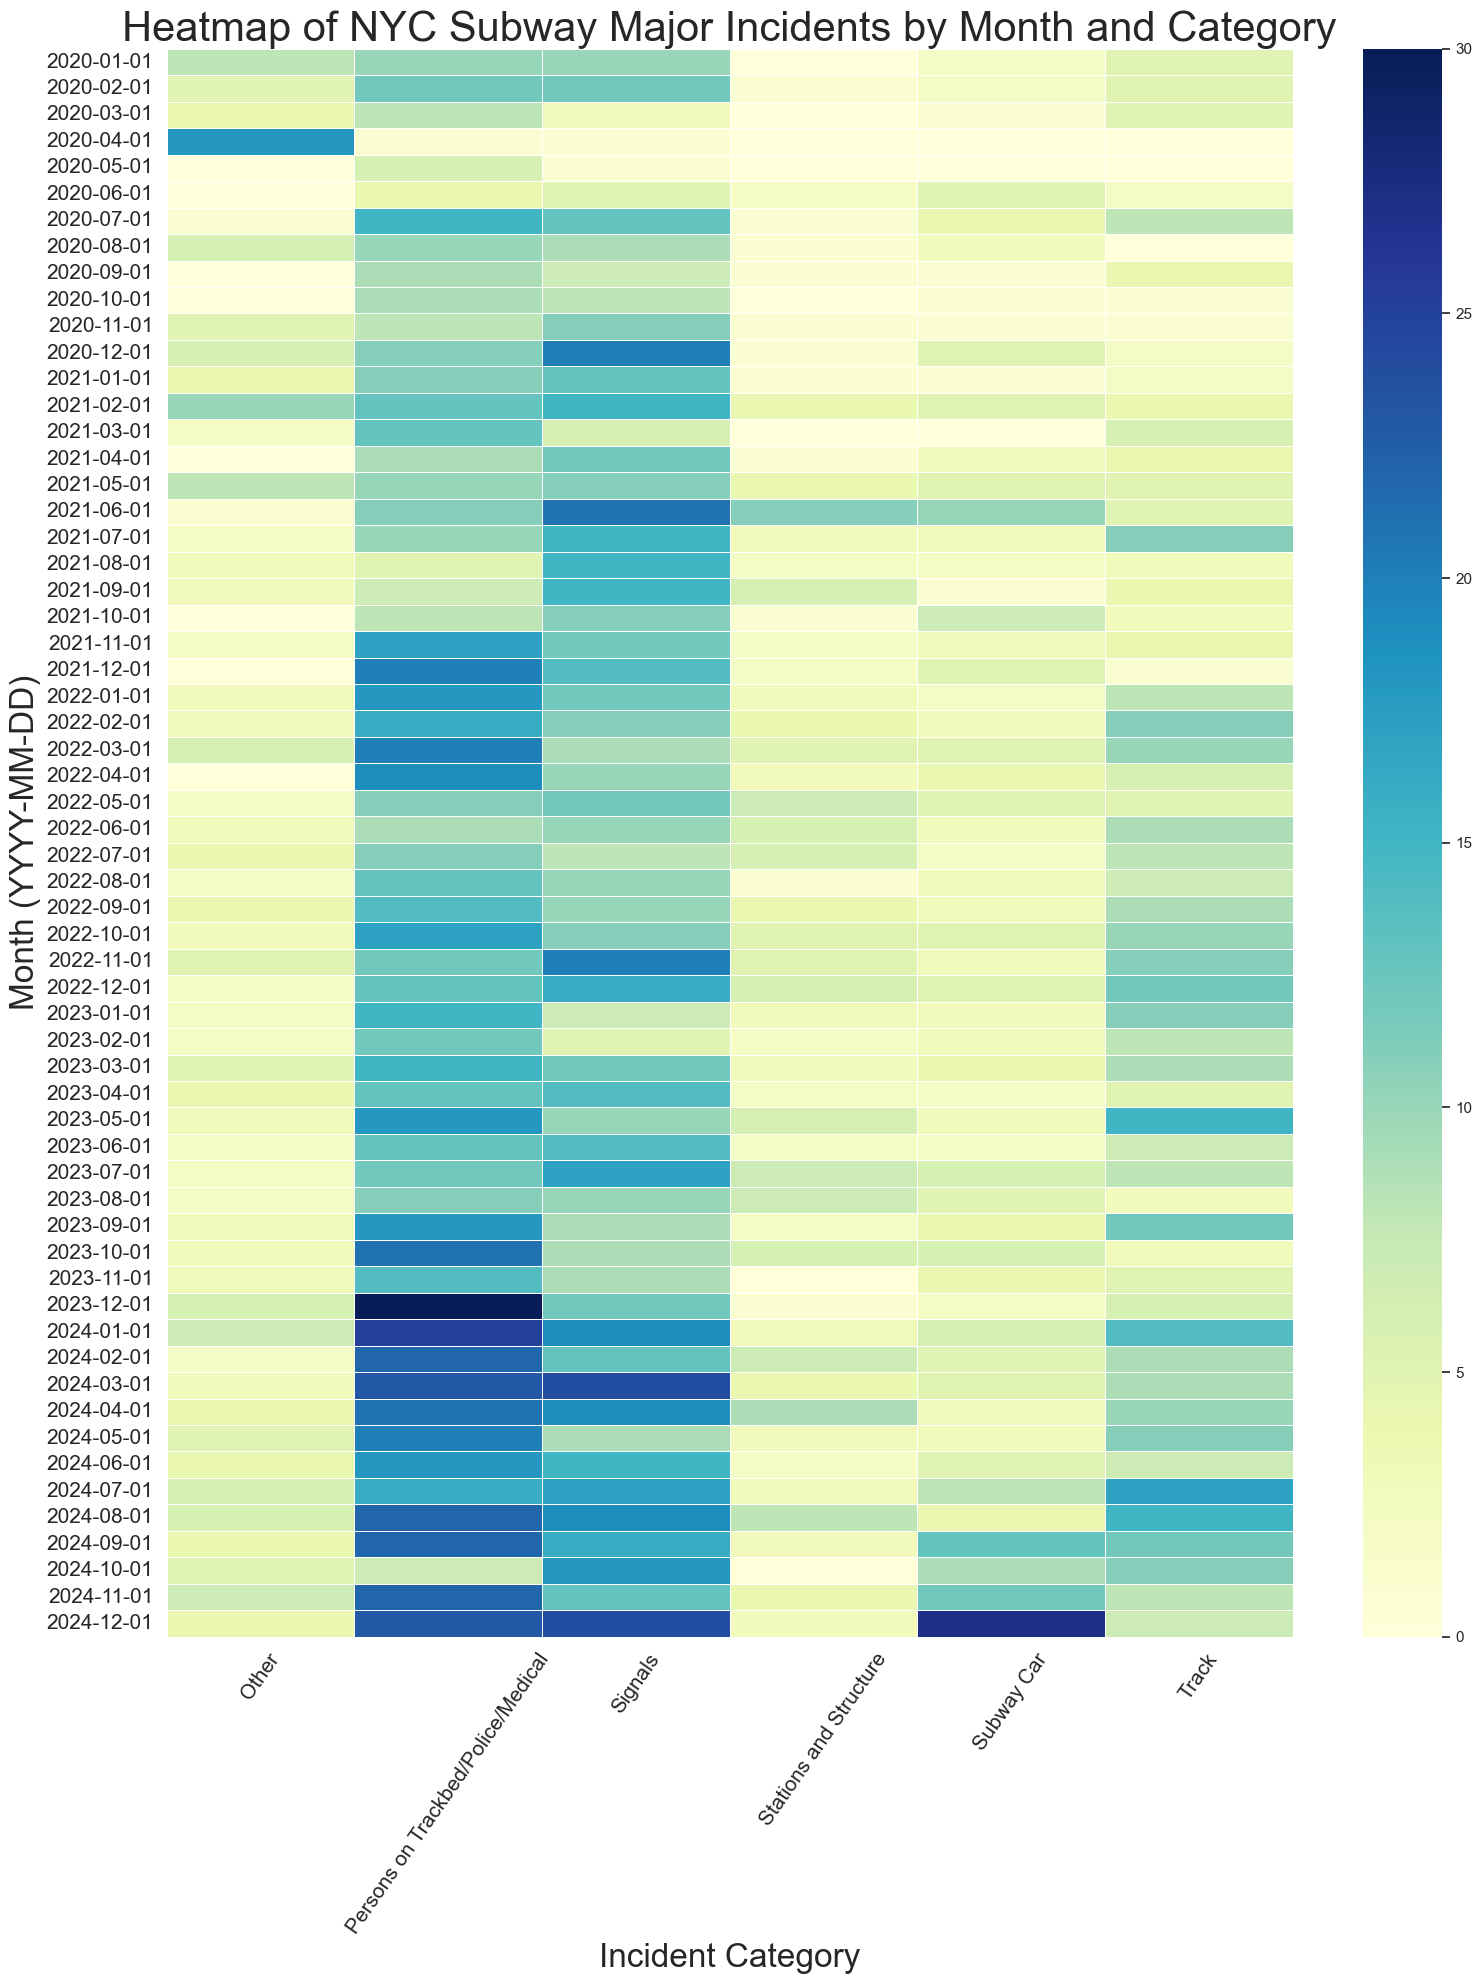

In [8]:
# Ensure 'month' column is in datetime format
df['month'] = pd.to_datetime(df['month'])

# Create pivot table for the heatmap
heatmap_data = df.pivot_table(index='month', columns='category', values='count', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)  # Sort categories alphabetically

# Convert index to string with format YYYY-MM-DD for better y-axis labels
heatmap_data.index = heatmap_data.index.strftime('%Y-%m-%d')

# --- HEATMAP 1: YlGnBu palette, NO annotations ---
plt.figure(figsize=(16, 20))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of NYC Subway Major Incidents by Month and Category', fontsize=30)
plt.xlabel('Incident Category', fontsize=24)
plt.ylabel('Month (YYYY-MM-DD)', fontsize=24)
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


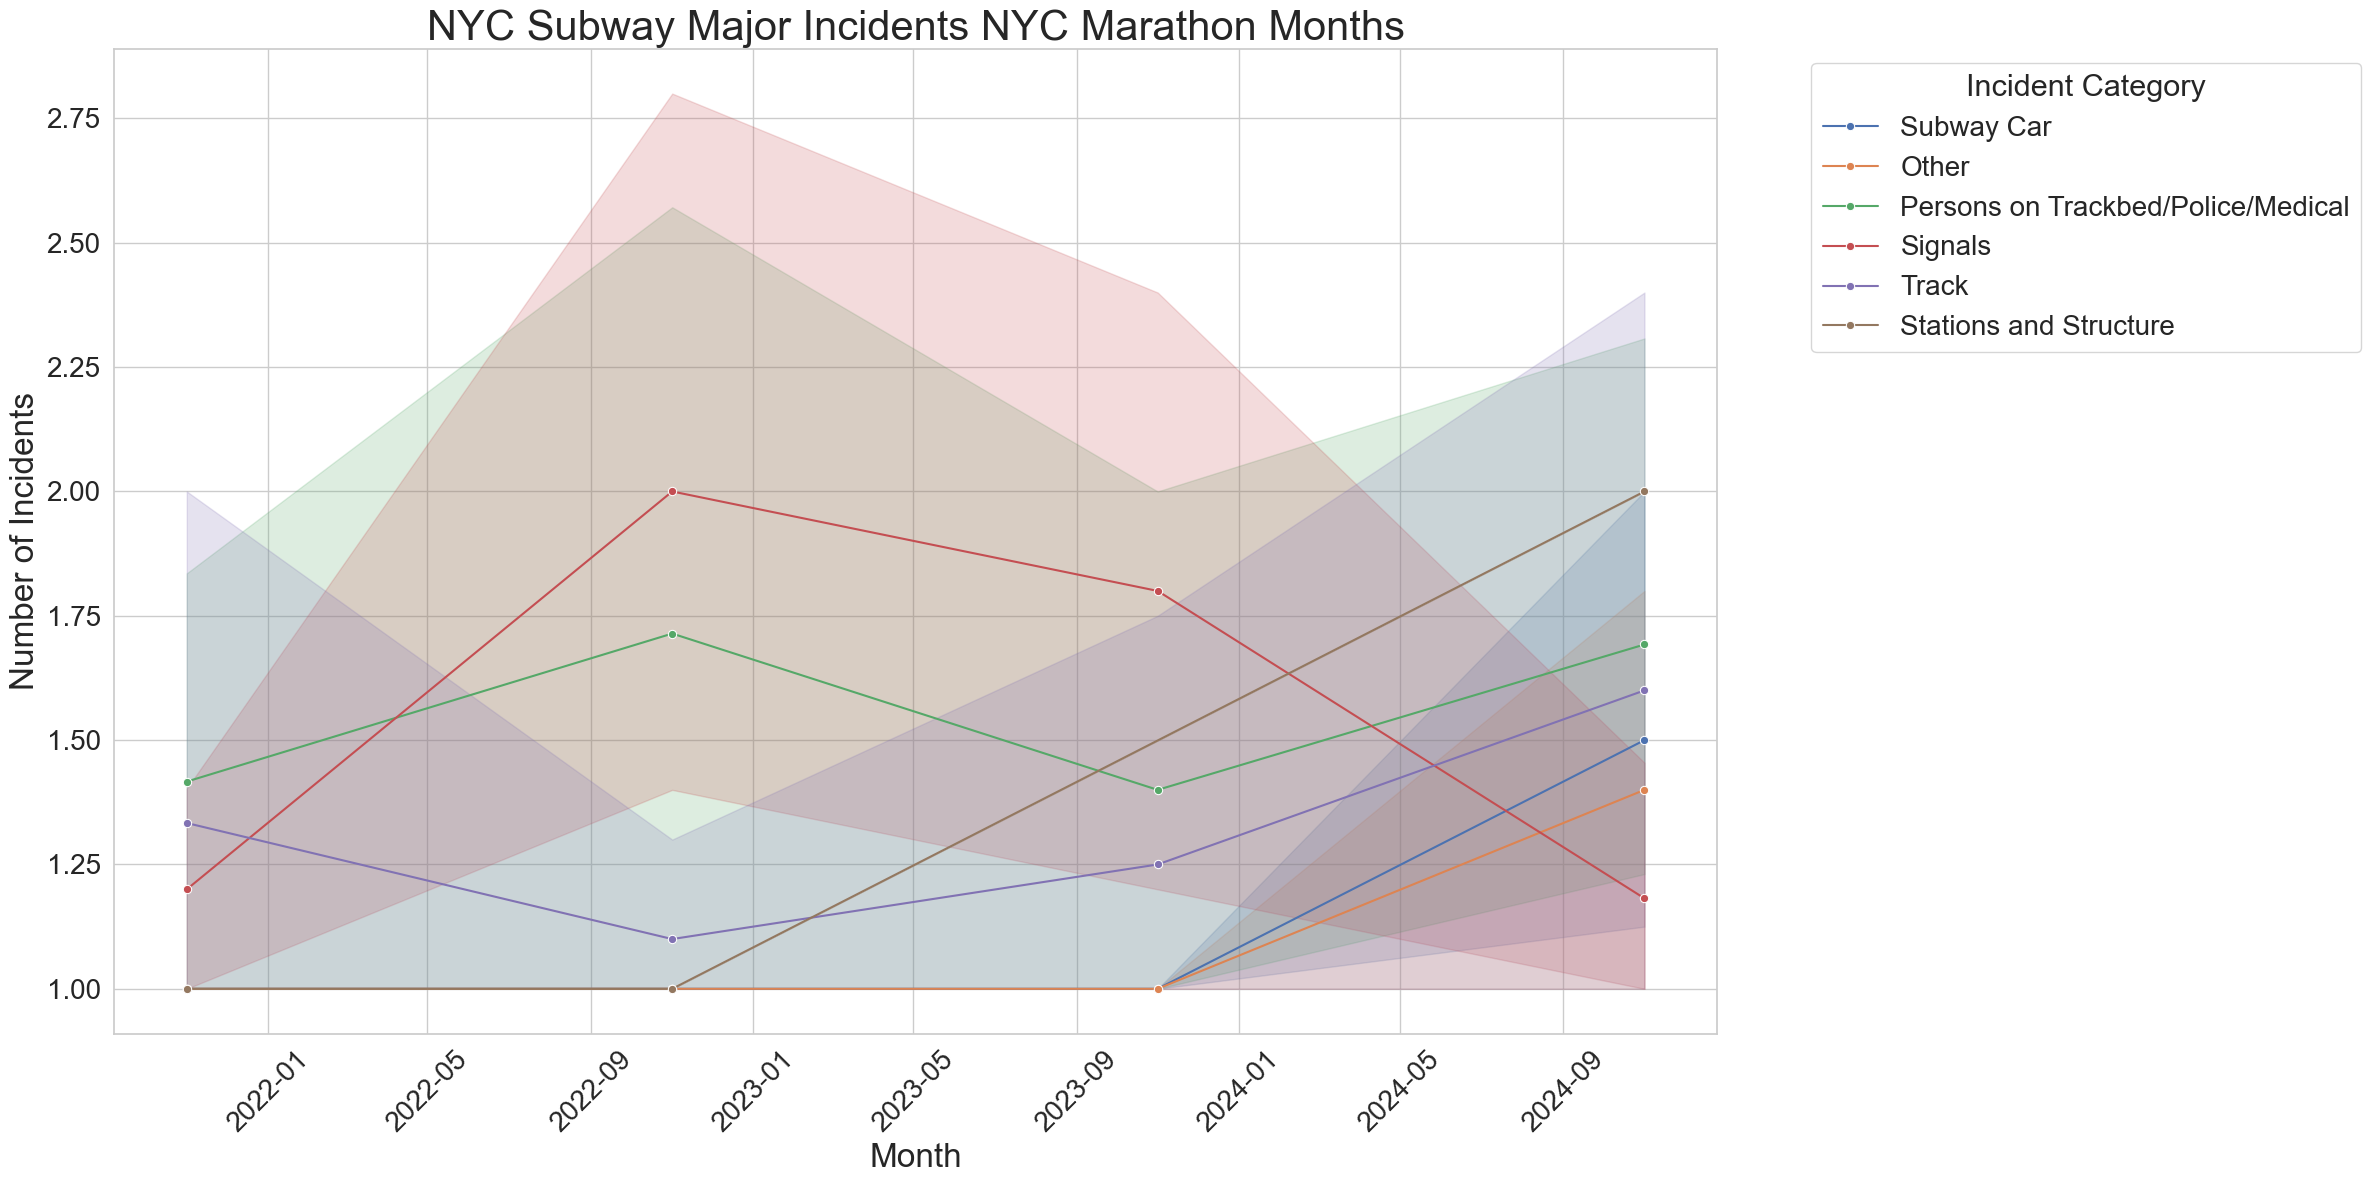

In [9]:
# --- Marathon Incident Timeline ---

# Ensure 'month' is datetime and rounded to start of month
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M').dt.to_timestamp()

# Filter for Marathon months
marathon_months = pd.to_datetime(['2021-11', '2022-11', '2023-11', '2024-11'])
marathon_df = df[df['month'].isin(marathon_months)].copy()

# Plot
plt.figure(figsize=(24, 12))
sns.lineplot(data=marathon_df, x='month', y='count', hue='category', marker='o')
plt.title('NYC Subway Major Incidents NYC Marathon Months', fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.legend(
    title='Incident Category',
    title_fontsize=22,  # Adjusted for larger title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20  # Legend label font size
)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


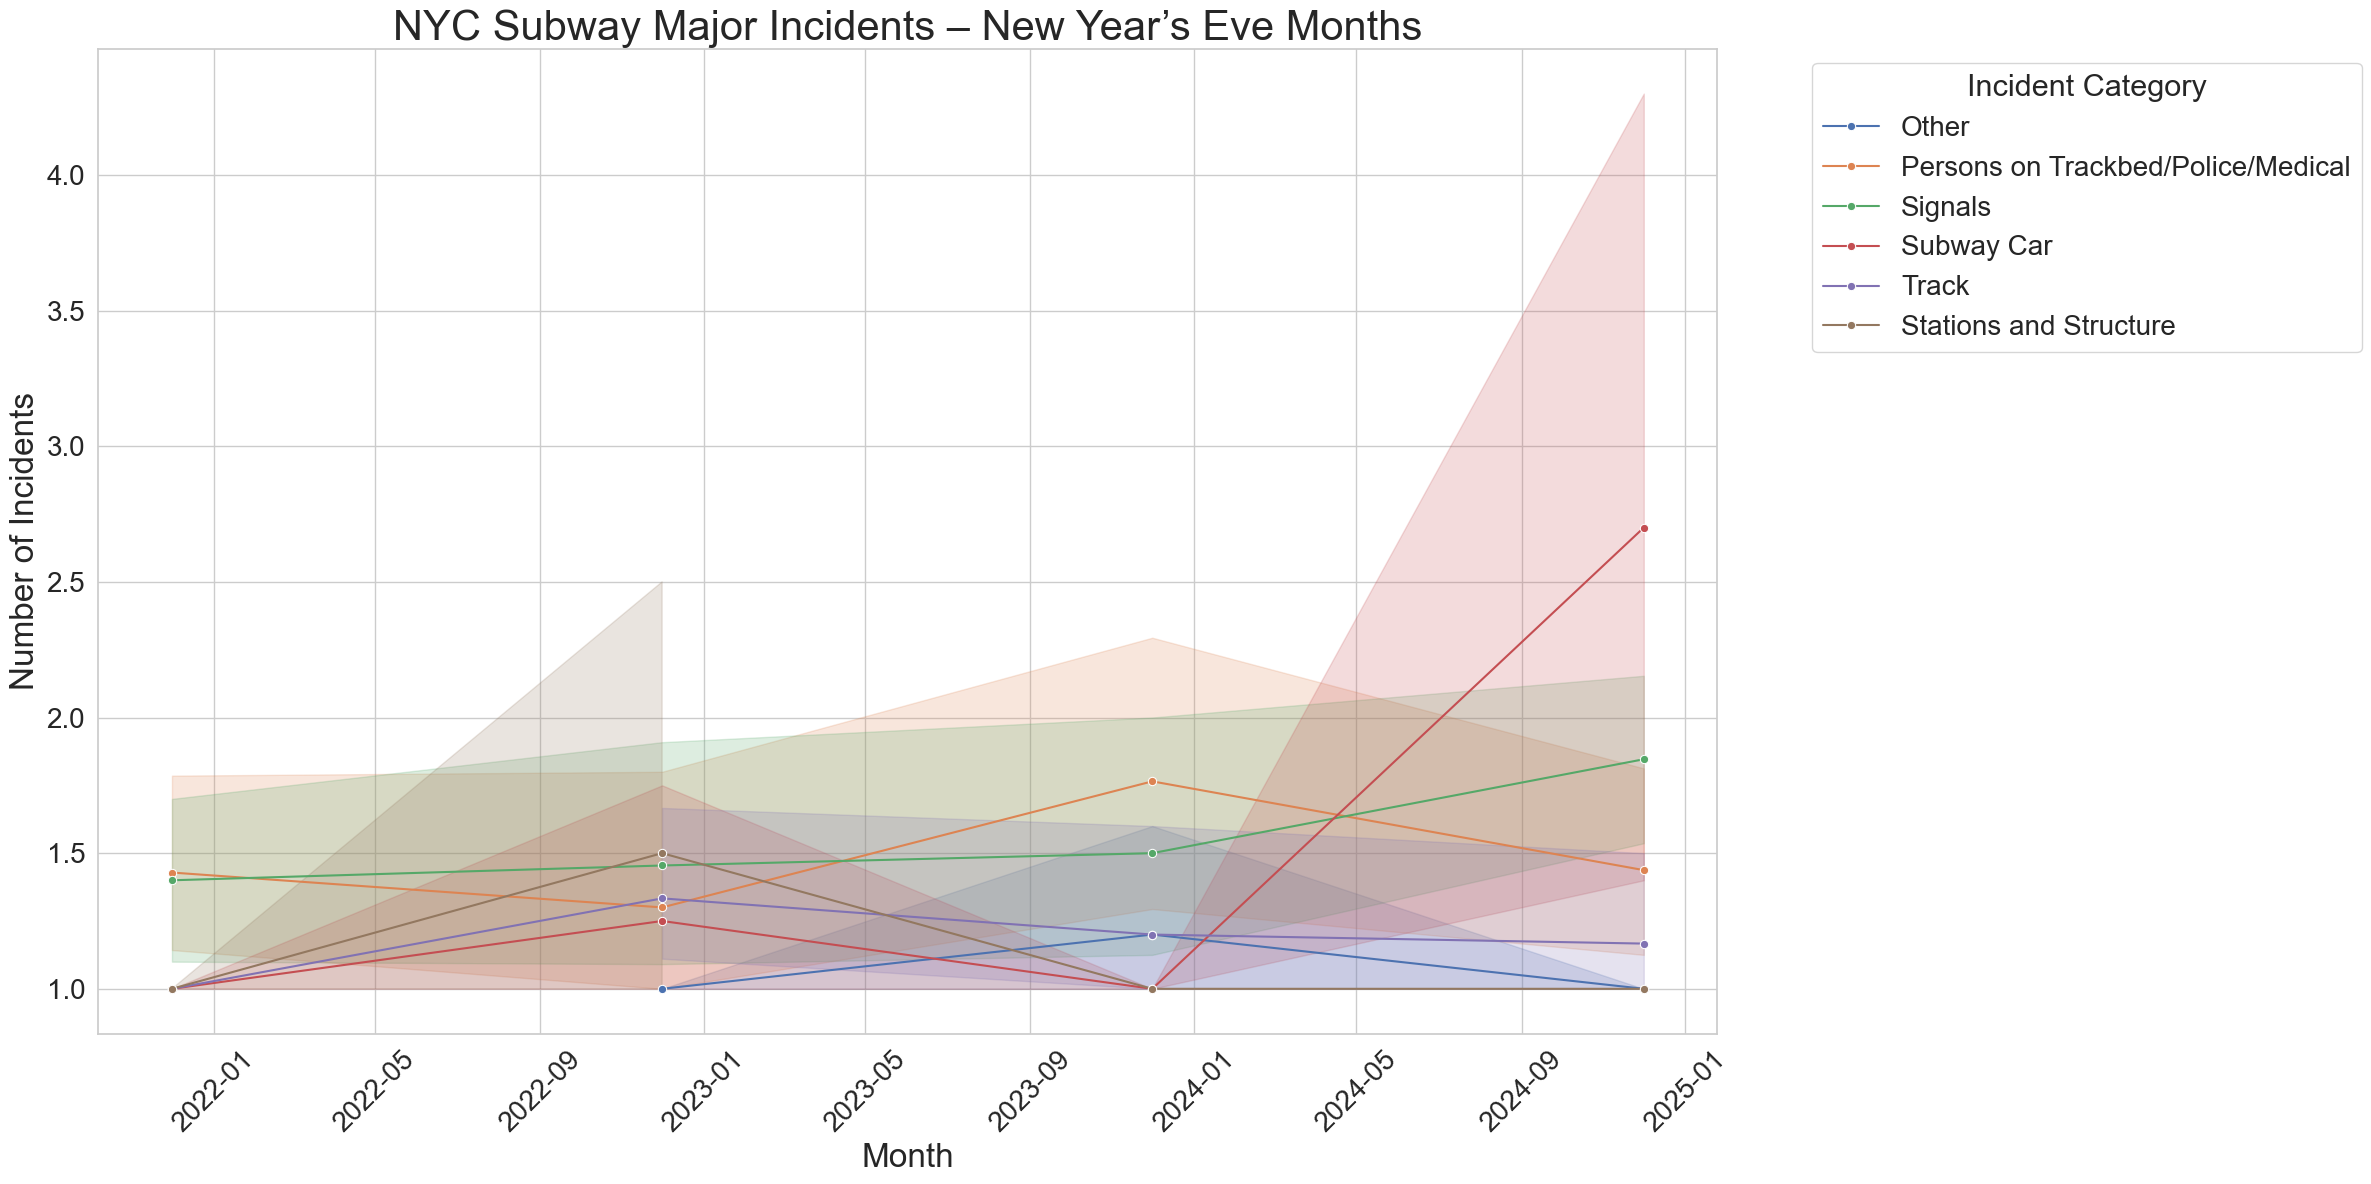

In [10]:
# --- New Year's Eve Incident Timeline ---

# Filter for December months (when NYE happens)
nye_months = pd.to_datetime(['2021-12', '2022-12', '2023-12', '2024-12'])
nye_df = df[df['month'].isin(nye_months)].copy()

# Plot
# Plot
plt.figure(figsize=(24, 12))
sns.lineplot(data=nye_df, x='month', y='count', hue='category', marker='o')
plt.title('NYC Subway Major Incidents – New Year’s Eve Months', fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.legend(
    title='Incident Category',
    title_fontsize=22,  # Adjusted for larger title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20  # Legend label font size
)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assuming df is your dataframe with columns: month, category, count
# Ensure 'month' is datetime and normalize to month start
df['month'] = pd.to_datetime(df['month']).dt.to_period('M').dt.to_timestamp()

# Define Marathon months
marathon_months = pd.to_datetime(['2021-11', '2022-11', '2023-11', '2024-11'])

# Create a flag column for Marathon or not
df['event_type'] = df['month'].isin(marathon_months)
df['event_type'] = df['event_type'].replace({True: 'Marathon', False: 'Regular'})

# Group and aggregate
grouped = df.groupby(['month', 'category', 'event_type'], as_index=False)['count'].sum()

# Calculate year-over-year percentage changes for marathon months
marathon_data = grouped[grouped['event_type'] == 'Marathon'].copy()
marathon_data['year'] = marathon_data['month'].dt.year
marathon_yoy = marathon_data.pivot_table(
    index=['year', 'category'], 
    values='count', 
    aggfunc='sum'
).reset_index()

# Create a more sophisticated visualization with subplots
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.7, 0.3],
    subplot_titles=(
        "NYC Subway Major Incidents — Marathon vs. Regular Months",
        "Monthly Incident Distribution by Category"
    ),
    vertical_spacing=0.15
)

# Custom color palette for better visual distinction
colors = px.colors.qualitative.Bold
category_colors = {cat: colors[i % len(colors)] for i, cat in enumerate(grouped['category'].unique())}

# Add main time series lines to first subplot
for i, category in enumerate(sorted(grouped['category'].unique())):
    for event_type in ['Marathon', 'Regular']:
        subset = grouped[(grouped['category'] == category) & (grouped['event_type'] == event_type)]
        
        # Sort by date for proper line connection
        subset = subset.sort_values('month')
        
        # Line style based on event type
        dash_style = 'dot' if event_type == 'Regular' else 'solid'
        marker_size = 8 if event_type == 'Marathon' else 6
        
        fig.add_trace(
            go.Scatter(
                x=subset['month'],
                y=subset['count'],
                mode='lines+markers',
                name=f"{category} ({event_type})",
                line=dict(color=category_colors[category], dash=dash_style, width=2),
                marker=dict(size=marker_size, line=dict(width=1, color='white')),
                hovertemplate='<b>%{x|%b %Y}</b><br>' +
                              'Category: ' + category + '<br>' +
                              'Month Type: ' + event_type + '<br>' +
                              'Incidents: %{y}<extra></extra>'
            ),
            row=1, col=1
        )

# Add rolling average for overall trend
overall_monthly = grouped.groupby('month', as_index=False)['count'].sum()
overall_monthly = overall_monthly.sort_values('month')
overall_monthly['rolling_avg'] = overall_monthly['count'].rolling(window=3, center=True).mean()

fig.add_trace(
    go.Scatter(
        x=overall_monthly['month'],
        y=overall_monthly['rolling_avg'],
        mode='lines',
        line=dict(color='rgba(0,0,0,0.5)', width=2, dash='dash'),
        name='3-Month Rolling Average (All Categories)',
        hovertemplate='<b>%{x|%b %Y}</b><br>3-Month Avg: %{y:.1f}<extra></extra>'
    ),
    row=1, col=1
)

# Add vertical shaded regions for marathon months
for marathon_month in marathon_months:
    month_start = marathon_month
    month_end = month_start + pd.DateOffset(months=1)
    
    fig.add_shape(
        type="rect",
        x0=month_start,
        x1=month_end,
        y0=0,
        y1=1,
        yref="paper",
        fillcolor="rgba(220,220,220,0.3)",
        layer="below",
        line_width=0,
        row=1, col=1
    )
    
    # Add marathon month label
    fig.add_annotation(
        x=month_start + pd.DateOffset(days=15),
        y=1.02,
        text=f"NYC Marathon<br>{month_start.strftime('%b %Y')}",
        showarrow=False,
        yref="paper",
        font=dict(size=10, color="rgba(0,0,0,0.6)"),
        row=1, col=1
    )

# Add monthly distributions as a stacked bar chart in second subplot
monthly_dist = grouped.pivot_table(
    index='month', 
    columns='category', 
    values='count', 
    aggfunc='sum'
).fillna(0)

# Get month and year for x-axis labels
monthly_dist = monthly_dist.reset_index()
monthly_dist['month_year'] = monthly_dist['month'].dt.strftime('%b %Y')

for category in monthly_dist.columns[1:-1]:  # Skip 'month' and 'month_year'
    fig.add_trace(
        go.Bar(
            x=monthly_dist['month_year'],
            y=monthly_dist[category],
            name=category,
            marker_color=category_colors[category],
            hovertemplate='<b>%{x}</b><br>' +
                          'Category: ' + category + '<br>' +
                          'Incidents: %{y}<extra></extra>'
        ),
        row=2, col=1
    )

# Highlight marathon months in the bottom chart
for marathon_month in marathon_months:
    month_year = marathon_month.strftime('%b %Y')
    idx = monthly_dist[monthly_dist['month_year'] == month_year].index
    
    if len(idx) > 0:
        fig.add_shape(
            type="rect",
            x0=month_year,
            x1=month_year,
            xref="x2",
            y0=0,
            y1=1,
            yref="paper",
            fillcolor="rgba(255,200,200,0.0)",
            line=dict(color="rgba(255,0,0,0.5)", width=2),
            layer="below",
            row=2, col=1
        )

# Layout improvements
fig.update_layout(
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.5,
        xanchor="center",
        x=0.5,
        itemsizing="constant",
        font=dict(size=12)
    ),
    hovermode="x unified",
    hoverlabel=dict(bgcolor="white", font_size=12),
    font=dict(family="Arial, sans-serif", size=12),
    width=1000,
    height=800,
    margin=dict(t=100, b=150, l=80, r=40),
    barmode='stack'
)

# X-axis formatting
fig.update_xaxes(
    title_text="",
    tickangle=45,
    tickfont=dict(size=10),
    dtick="M3",  # Show every 3 months
    tickformat="%b %Y",
    row=1, col=1
)

fig.update_xaxes(
    title_text="",
    tickangle=45,
    tickfont=dict(size=10),
    dtick=2,  # Show every other label to prevent overcrowding
    row=2, col=1
)

# Y-axis formatting
fig.update_yaxes(
    title_text="Number of Incidents",
    title_font=dict(size=14),
    gridcolor='rgba(200,200,200,0.2)',
    row=1, col=1
)

fig.update_yaxes(
    title_text="Number of Incidents",
    title_font=dict(size=14),
    gridcolor='rgba(200,200,200,0.2)',
    row=2, col=1
)

# Add title and annotations
fig.add_annotation(
    text="NYC Subway Incidents Analysis: Marathon Impact",
    xref="paper", yref="paper",
    x=0.5, y=1.12,
    showarrow=False,
    font=dict(size=20, family="Arial, sans-serif", color="#333")
)

fig.add_annotation(
    text="Source: NYC MTA Data (2021-2024)",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=10, color="gray")
)

# Save as HTML with configuration options
fig.write_html(
    "nyc_incidents_marathon_analysis.html",
    include_plotlyjs=True,
    config={
        'displayModeBar': True,
        'modeBarButtonsToRemove': ['select2d', 'lasso2d'],
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_marathon_analysis',
            'height': 800,
            'width': 1000,
            'scale': 2
        }
    }
)

# Show figure
fig.show()

In [23]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import numpy as np

# Ensure 'month' is datetime and rounded to start of month
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M').dt.to_timestamp()

# Filter to only include data from 2024
df_2024 = df[df['month'].dt.year == 2024].copy()

# Aggregate by month to find total incidents per month (2024 only)
monthly_totals = df_2024.groupby('month')['count'].sum().reset_index()

# Sort to find months with most and least incidents
sorted_months = monthly_totals.sort_values('count', ascending=False)

# Get the two months with most incidents and two months with least incidents
top_months = sorted_months.head(2)['month'].tolist()
bottom_months = sorted_months.tail(2)['month'].tolist()

# Combine to get our target months
target_months = top_months + bottom_months
target_months.sort()  # Sort chronologically

# Filter dataframe for only these months (using the 2024 data)
highlight_df = df_2024[df_2024['month'].isin(target_months)].copy()

# Generate viridis color palette for categories
categories = highlight_df['category'].unique()
category_values = highlight_df.groupby('category')['count'].sum()
normed_values = category_values / category_values.max()

# Create color map using viridis
from matplotlib.cm import viridis
color_map = {cat: f'rgb{tuple(int(x*255) for x in viridis(normed_values[cat]))}' for cat in categories}

# Create figure
fig = go.Figure()

# Add bar traces for each category
for category in categories:
    category_data = highlight_df[highlight_df['category'] == category]
    
    fig.add_trace(
        go.Bar(
            x=category_data['month'],
            y=category_data['count'],
            name=category,
            marker_color=color_map.get(category, '#000'),
            hovertemplate='<b>%{x|%B %Y}</b><br>' +
                          'Category: ' + category + '<br>' +
                          'Incidents: %{y:.2f}<extra></extra>'
        )
    )

# Format dates for x-axis
date_strings = [d.strftime('%b %Y') for d in target_months]

# Update layout
fig.update_layout(
    title={
        'text': 'NYC Subway Major Incidents: Highest vs. Lowest Months (2024)',
        'font': {'size': 22, 'family': 'Arial, sans-serif'},
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': '',
        'title_font': {'size': 16},
        'tickfont': {'size': 14},
        'tickangle': 45,
        'gridcolor': '#eaeaea',
        'tickmode': 'array',
        'tickvals': target_months,
        'ticktext': date_strings,
        'categoryorder': 'array',
        'categoryarray': target_months
    },
    yaxis={
        'title': 'Number of Incidents',
        'title_font': {'size': 16},
        'tickfont': {'size': 14},
        'gridcolor': '#eaeaea',
    },
    plot_bgcolor='white',
    legend={
        'title': {'text': 'Incident Category', 'font': {'size': 16}},
        'font': {'size': 14},
        'yanchor': 'top',
        'xanchor': 'right',
        'y': 0.80,
        'x': 1.4,
        'bordercolor': '#e0e0e0',
        'borderwidth': 1
    },
    width=1000,
    height=700,
    margin=dict(t=80, b=100, l=80, r=250),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    annotations=[
        # Add annotations for top months
        dict(
            x=top_months[0],
            y=monthly_totals[monthly_totals['month'] == top_months[0]]['count'].values[0] + 5,
            text="Highest",
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40,
            font=dict(size=14)
        ),
        dict(
            x=top_months[1],
            y=monthly_totals[monthly_totals['month'] == top_months[1]]['count'].values[0] + 5,
            text="2nd Highest",
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40,
            font=dict(size=14)
        ),
        # Add annotations for bottom months
        dict(
            x=bottom_months[0],
            y=monthly_totals[monthly_totals['month'] == bottom_months[0]]['count'].values[0] + 5,
            text="2nd Lowest",
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40,
            font=dict(size=14)
        ),
        dict(
            x=bottom_months[1],
            y=monthly_totals[monthly_totals['month'] == bottom_months[1]]['count'].values[0] + 5,
            text="Lowest",
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40,
            font=dict(size=14)
        )
    ]
)

# Update grid settings
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='#eaeaea',
    zeroline=False
)

fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='#eaeaea',
    zeroline=False
)

# Save as interactive HTML
fig.write_html(
    "nyc_subway_high_low_months_incidents_2024.html",
    include_plotlyjs=True,
    config={
        'displayModeBar': True,
        'modeBarButtonsToRemove': ['select2d', 'lasso2d'],
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_high_low_incidents_bar',
            'height': 700,
            'width': 1000,
            'scale': 2
        }
    }
)

# Display the figure
fig.show()

In [13]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Create a copy to work with
df_analysis = df.copy()

# Ensure 'month' is datetime
df_analysis['month'] = pd.to_datetime(df_analysis['month'])

# Create a visualization for incidents by division
def plot_by_division():
    # Aggregate data by division and category
    division_data = df_analysis.groupby(['division', 'category'])['count'].sum().reset_index()
    
    # Create a more visually appealing color palette
    colors = px.colors.qualitative.Bold
    
    # Create figure
    fig = px.bar(
        division_data, 
        x='division', 
        y='count', 
        color='category',
        color_discrete_sequence=colors,
        title='NYC Subway Incidents by Division',
        labels={'count': 'Number of Incidents', 'division': 'Division'},
        height=600,
        barmode='stack',  # Stack the categories to show total incidents per division
        width=800  # Adjust overall figure width
    )
    
    # Improve layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
        legend_title='Incident Category',
        xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
        yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
        title=dict(font=dict(size=18)),
        bargap=0.3,  # Adjust space between bars (0 to 1)
        bargroupgap=0.1  # Adjust space between bar groups (0 to 1)
    )
    
    # You can also update bar width directly
    for data in fig.data:
        data.width = 0.7  # Adjust individual bar width (0 to 1)
    
    return fig

# Create a visualization for incidents by line
def plot_by_line():
    # Aggregate data by line and category
    line_data = df_analysis.groupby(['division', 'line', 'category'])['count'].sum().reset_index()
    
    # Sort by division and line
    line_data = line_data.sort_values(['division', 'line'])
    
    # Create figure
    fig = px.bar(
        line_data, 
        x='line', 
        y='count', 
        color='category',
        facet_col='division',  # Create separate charts for each division
        facet_col_wrap=2,      # Two columns of charts
        color_discrete_sequence=px.colors.qualitative.Bold,
        title='NYC Subway Incidents by Line and Division',
        labels={'count': 'Number of Incidents', 'line': 'Line'},
        height=800,
        width=900
    )
    
    # Improve layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
        legend_title='Incident Category',
        title=dict(font=dict(size=20)),
        barmode='stack'  # Stack the categories to show total incidents per line
    )
    
    # Update axis titles
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
    fig.update_yaxes(title_text="Number of Incidents")
    
    return fig

# Create a combined visualization - monthly trends by division
def plot_monthly_by_division():
    # Aggregate data by month and division
    monthly_division = df_analysis.groupby(['month', 'division'])['count'].sum().reset_index()
    
    # Create figure
    fig = px.line(
        monthly_division, 
        x='month', 
        y='count', 
        color='division',
        markers=True,
        line_shape='linear',
        title='Monthly Incidents by Division',
        labels={'count': 'Number of Incidents', 'month': 'Month'},
        height=500
    )
    
    # Improve layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
        legend_title='Division',
        xaxis=dict(
            title_font=dict(size=18), 
            tickfont=dict(size=12),
            tickformat='%b %Y'
        ),
        yaxis=dict(title_font=dict(size=18), tickfont=dict(size=14)),
        title=dict(font=dict(size=20))
    )
    
    return fig

# Interactive dashboard with all visualizations
def create_dashboard():
    # Create subplot figure with 3 rows
    fig = make_subplots(
        rows=3, 
        cols=1,
        subplot_titles=(
            "Incidents by Division", 
            "Monthly Incidents by Division", 
            "Incidents by Line (Faceted by Division)"
        ),
        vertical_spacing=0.1,
        specs=[
            [{"type": "bar"}],
            [{"type": "scatter"}],
            [{"type": "bar"}]
        ],
        row_heights=[0.25, 0.25, 0.5]
    )
    
    # Get the individual plots
    division_fig = plot_by_division()
    monthly_fig = plot_monthly_by_division()
    line_fig = plot_by_line()
    
    # Add division plot traces to subplot
    for trace in division_fig.data:
        fig.add_trace(trace, row=1, col=1)
    
    # Add monthly plot traces to subplot
    for trace in monthly_fig.data:
        fig.add_trace(trace, row=2, col=1)
    
    # We can't directly add the faceted line plot, so we'll create a simplified version
    line_data = df_analysis.groupby(['line', 'category'])['count'].sum().reset_index()
    line_data = line_data.sort_values('count', ascending=False)
    
    # Get top 15 lines by incident count for readability
    top_lines = line_data.groupby('line')['count'].sum().nlargest(15).index.tolist()
    line_data_filtered = line_data[line_data['line'].isin(top_lines)]
    
    # Create color map for consistent category coloring
    categories = line_data_filtered['category'].unique()
    colors = px.colors.qualitative.Bold[:len(categories)]
    color_map = dict(zip(categories, colors))
    
    # Add line plot traces
    for category in categories:
        category_data = line_data_filtered[line_data_filtered['category'] == category]
        fig.add_trace(
            go.Bar(
                x=category_data['line'],
                y=category_data['count'],
                name=category,
                marker_color=color_map[category],
                showlegend=False  # Legend already shown in first plot
            ),
            row=3, col=1
        )
    
    # Update layout
    fig.update_layout(
        height=1200,
        width=1000,
        title_text="NYC Subway Incidents Analysis",
        barmode='stack',
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
    )
    
    # Update x and y axes
    fig.update_xaxes(title_text="Division", row=1, col=1)
    fig.update_yaxes(title_text="Number of Incidents", row=1, col=1)
    
    fig.update_xaxes(title_text="Month", row=2, col=1)
    fig.update_yaxes(title_text="Number of Incidents", row=2, col=1)
    
    fig.update_xaxes(title_text="Line", row=3, col=1, tickangle=45)
    fig.update_yaxes(title_text="Number of Incidents", row=3, col=1)
    
    return fig

# Example usage - choose which visualization to display
# Uncomment the one you want to run
division_fig = plot_by_division()
line_fig = plot_by_line()
monthly_fig = plot_monthly_by_division()
dashboard = create_dashboard()

# Display the figures
division_fig.show()
line_fig.show()
monthly_fig.show()
dashboard.show()

# Save figures to HTML
division_fig.write_html("subway_incidents_by_division.html")
line_fig.write_html("subway_incidents_by_line.html")
monthly_fig.write_html("subway_incidents_monthly_by_division.html")
dashboard.write_html("subway_incidents_dashboard.html", 
                     config={
                         'displayModeBar': True,
                         'displaylogo': False,
                         'toImageButtonOptions': {
                             'format': 'png',
                             'filename': 'subway_incidents_analysis',
                             'scale': 2
                         }
                     })

In [21]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots

def plot_subway_divisions():
    # Assuming df_analysis contains the data from your original DataFrame
    
    # Define the correct trains for each division
    division_trains = {
        'A Division': ['1', '2', '3', '4', '5', '6', '7'],
        'B Division': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'JZ', 'L', 'M', 'N', 'Q', 'R']
    }
    
    # Updated categories to match the second illustration
    categories = [
        'Other', 
        'Persons on Trackbed/Police/Medical', 
        'Signals', 
        'Subway Car', 
        'Track', 
        'Stations and Structure'
    ]
    
    # Define colors to match the plot
    color_mapping = {
        'Other': '#E8C350',  # Light orange/yellow
        'Persons on Trackbed/Police/Medical': '#45B7B8',  # Teal
        'Signals': '#76B947',  # Green
        'Subway Car': '#FF6B35',  # Orange-red
        'Track': '#2D82B7',  # Blue
        'Stations and Structure': '#8B5FBF'  # Purple
    }
    
    # Filter the data to include only the specified trains for each division
    filtered_data = []
    for division, trains in division_trains.items():
        div_data = df_analysis[df_analysis['division'] == division]
        div_data = div_data[div_data['line'].isin(trains)]
        filtered_data.append(div_data)
    
    # Combine the filtered data
    filtered_df = pd.concat(filtered_data) if filtered_data else pd.DataFrame()
    
    # If there's no data, create dummy data for visualization purposes
    if filtered_df.empty:
        # Create dummy data with the correct structure
        divisions = []
        lines = []
        incident_categories = []
        counts = []
        
        # Add dummy data for each division and line
        for division, trains in division_trains.items():
            for train in trains:
                for category in categories:
                    divisions.append(division)
                    lines.append(train)
                    incident_categories.append(category)
                    # Random count between 5 and 25
                    counts.append(np.random.randint(5, 25))
        
        filtered_df = pd.DataFrame({
            'division': divisions,
            'line': lines,
            'category': incident_categories,
            'count': counts
        })
    
    # Aggregate by division, line, and category
    aggregated_data = filtered_df.groupby(['division', 'line', 'category'])['count'].sum().reset_index()
    
    # Create a 2D plot with both divisions
    fig = go.Figure()
    
    # Set up the subplots - 1 row, 2 columns
    fig = make_subplots(
        rows=1, 
        cols=2,
        subplot_titles=list(division_trains.keys()),
        horizontal_spacing=0.05
    )
    
    # Add traces for each division
    for idx, (division, trains) in enumerate(division_trains.items(), 1):
        # Filter data for this division
        div_data = aggregated_data[aggregated_data['division'] == division]
        
        # Add bars for each category
        for category in categories:
            cat_data = div_data[div_data['category'] == category]
            
            # Skip if no data for this category
            if cat_data.empty:
                continue
                
            # Sort by line to ensure correct order
            cat_data = cat_data.sort_values('line')
            
            fig.add_trace(
                go.Bar(
                    x=cat_data['line'],
                    y=cat_data['count'],
                    name=category,
                    marker_color=color_mapping[category],
                    legendgroup=category,
                    showlegend=idx == 1,  # Show legend only for first division
                ),
                row=1, 
                col=idx
            )
    
    # Update layout
    fig.update_layout(
        barmode='group',
        title=dict(
            text='NYC Subway Incidents by Division and Line',
            font=dict(size=22, family='Arial, sans-serif'),
            x=0.5
        ),
        legend=dict(
            title=dict(text='Incident Category', font=dict(size=14)),
            orientation='h',
            yanchor='bottom',
            y=-0.2,
            xanchor='center',
            x=0.5
        ),
        height=600,
        width=1100,
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif')
    )
    
    # Update axes
    for i in range(1, 3):
        fig.update_xaxes(
            title_text='Train Line',
            row=1,
            col=i,
            tickfont=dict(size=12),
            tickangle=0,
            gridcolor='lightgray',
            showgrid=True
        )
        
        fig.update_yaxes(
            title_text='Number of Incidents' if i == 1 else '',
            row=1,
            col=i,
            tickfont=dict(size=12),
            gridcolor='lightgray',
            showgrid=True
        )
    
    # Add hover data
    fig.update_traces(
        hovertemplate="<b>%{x}</b><br>" +
                     "Category: %{data.name}<br>" +
                     "Incidents: %{y}<br>" +
                     "<extra></extra>"
    )
    
    return fig

# Create and show the figure
subway_divisions_plot = plot_subway_divisions()
subway_divisions_plot.show()

# Save to HTML
subway_divisions_plot.write_html(
    "nyc_subway_incidents_by_division_line.html",
    config={
        'displayModeBar': True,
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_incidents_by_division_line',
            'scale': 2
        }
    }
)

In [31]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.cm as cm

def plot_subway_divisions():
    # Assuming df_analysis contains the data from your original DataFrame
    
    # Define the correct trains for each division
    division_trains = {
        'A Division': ['1', '2', '3', '4', '5', '6', '7'],
        'B Division': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'JZ', 'L', 'M', 'N', 'Q', 'R']
    }
    
    # Updated categories to match the second illustration
    categories = [
        'Other', 
        'Persons on Trackbed/Police/Medical', 
        'Signals', 
        'Subway Car', 
        'Track', 
        'Stations and Structure'
    ]
    
    # Filter the data to include only the specified trains for each division
    filtered_data = []
    for division, trains in division_trains.items():
        div_data = df_analysis[df_analysis['division'] == division]
        div_data = div_data[div_data['line'].isin(trains)]
        filtered_data.append(div_data)
    
    # Combine the filtered data
    filtered_df = pd.concat(filtered_data) if filtered_data else pd.DataFrame()
    
    # If there's no data, create dummy data for visualization purposes
    if filtered_df.empty:
        # Create dummy data with the correct structure
        divisions = []
        lines = []
        incident_categories = []
        counts = []
        
        # Add dummy data for each division and line
        for division, trains in division_trains.items():
            for train in trains:
                for category in categories:
                    divisions.append(division)
                    lines.append(train)
                    incident_categories.append(category)
                    # Random count between 5 and 25
                    counts.append(np.random.randint(5, 25))
        
        filtered_df = pd.DataFrame({
            'division': divisions,
            'line': lines,
            'category': incident_categories,
            'count': counts
        })
    
    # Aggregate by division, line, and category
    aggregated_data = filtered_df.groupby(['division', 'line', 'category'])['count'].sum().reset_index()
    
    # Normalize category counts for color mapping
    category_totals = aggregated_data.groupby('category')['count'].sum()
    normed_values = category_totals / category_totals.max()
    
    # Create color map using viridis
    color_mapping = {
        cat: f'rgb{tuple(int(x*255) for x in cm.viridis(normed_values[cat]))}' 
        for cat in categories
    }
    
    # Create a 2D plot with both divisions
    fig = make_subplots(
        rows=1, 
        cols=2,
        subplot_titles=list(division_trains.keys()),
        horizontal_spacing=0.05
    )
    
    # Add traces for each division
    for idx, (division, trains) in enumerate(division_trains.items(), 1):
        # Filter data for this division
        div_data = aggregated_data[aggregated_data['division'] == division]
        
        # Add bars for each category
        for category in categories:
            cat_data = div_data[div_data['category'] == category]
            
            # Skip if no data for this category
            if cat_data.empty:
                continue
                
            # Sort by line to ensure correct order
            cat_data = cat_data.sort_values('line')
            
            fig.add_trace(
                go.Bar(
                    x=cat_data['line'],
                    y=cat_data['count'],
                    name=category,
                    marker_color=color_mapping[category],
                    legendgroup=category,
                    showlegend=idx == 1,  # Show legend only for first division
                ),
                row=1, 
                col=idx
            )
    
    # Update layout
    fig.update_layout(
        barmode='group',
        title=dict(
            text='NYC Subway Incidents by Division and Line',
            font=dict(size=22, family='Arial, sans-serif'),
            x=0.5
        ),
        legend=dict(
            title=dict(text='Incident Category', font=dict(size=14)),
            orientation='h',
            yanchor='bottom',
            y=-0.2,
            xanchor='center',
            x=0.5
        ),
        height=600,
        width=1100,
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif')
    )
    
    # Update axes
    for i in range(1, 3):
        fig.update_xaxes(
            title_text='Train Line',
            row=1,
            col=i,
            tickfont=dict(size=12),
            tickangle=0,
            gridcolor='lightgray',
            showgrid=True
        )
        
        fig.update_yaxes(
            title_text='Number of Incidents' if i == 1 else '',
            row=1,
            col=i,
            tickfont=dict(size=12),
            gridcolor='lightgray',
            showgrid=True
        )
    
    # Add hover data
    fig.update_traces(
        hovertemplate="<b>%{x}</b><br>" +
                     "Category: %{data.name}<br>" +
                     "Incidents: %{y}<br>" +
                     "<extra></extra>"
    )
    
    return fig

# Create and show the figure
subway_divisions_plot = plot_subway_divisions()
subway_divisions_plot.show()

# Save to HTML
subway_divisions_plot.write_html(
    "nyc_subway_incidents_by_division_line.html",
    config={
        'displayModeBar': True,
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_incidents_by_division_line',
            'scale': 2
        }
    }
)

In [15]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# First, we need to organize the subway system data
# Based on the NYC subway map provided, we know there are divisions (A Division, B Division)
# and lines (1, 2, 3, 4, 5, 6, 7, A, B, C, D, E, F, G, J, L, M, N, Q, R, S, W, Z)

# Let's define the structure of NYC subway system
subway_structure = {
    'A DIVISION': ['1', '2', '3', '4', '5', '6', '7', 'S'],  # IRT lines (numbered)
    'B DIVISION': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'J', 'L', 'M', 'N', 'Q', 'R', 'W', 'Z'],  # BMT/IND lines (lettered)
    'SIR': ['SI']  # Staten Island Railway
}

# Function to aggregate incidents by division and line
def create_heatmap_data(df):
    # Ensure the date is properly formatted
    df['month'] = pd.to_datetime(df['month'])
    
    # Aggregate incidents by division and line
    heatmap_data = df.groupby(['division', 'line'])['count'].sum().reset_index()
    
    # Create a pivot table for the heatmap
    heatmap_pivot = heatmap_data.pivot_table(
        values='count', 
        index='division', 
        columns='line', 
        aggfunc='sum', 
        fill_value=0
    )
    
    return heatmap_pivot

# Function to create a heatmap visualization
def plot_division_line_heatmap(df):
    # Get aggregated data
    heatmap_data = create_heatmap_data(df)
    
    # Create a heatmap using Plotly
    fig = px.imshow(
        heatmap_data,
        labels=dict(x="Line", y="Division", color="Incident Count"),
        x=heatmap_data.columns,
        y=heatmap_data.index,
        color_continuous_scale='YlOrRd',  # Yellow to Orange to Red color scale
        title="NYC Subway Incidents Heatmap by Division and Line"
    )
    
    # Improve layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif', size=12),
        width=1000,
        height=600,
        coloraxis_colorbar=dict(
            title="Incident Count",
            thicknessmode="pixels", thickness=20,
            lenmode="pixels", len=300,
            yanchor="top", y=1,
            ticks="outside"
        )
    )
    
    # Add annotations with the incident count
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            value = heatmap_data.iloc[i, j]
            if value > 0:  # Only annotate cells with incidents
                fig.add_annotation(
                    x=j,
                    y=i,
                    text=str(int(value)),
                    showarrow=False,
                    font=dict(
                        color="black" if value < heatmap_data.values.max() * 0.7 else "white"
                    )
                )
    
    return fig

# Function to create a more detailed heatmap by month and line
def plot_monthly_line_heatmap(df):
    # Ensure the date is properly formatted
    df['month'] = pd.to_datetime(df['month'])
    df['month_str'] = df['month'].dt.strftime('%Y-%m')
    
    # Get top 15 lines by incident count for readability
    line_totals = df.groupby('line')['count'].sum().reset_index()
    top_lines = line_totals.sort_values('count', ascending=False).head(15)['line'].tolist()
    
    # Filter for top lines
    df_top = df[df['line'].isin(top_lines)]
    
    # Aggregate by month and line
    monthly_line_data = df_top.groupby(['month_str', 'line'])['count'].sum().reset_index()
    
    # Create a pivot table
    heatmap_pivot = monthly_line_data.pivot_table(
        values='count', 
        index='month_str', 
        columns='line', 
        aggfunc='sum', 
        fill_value=0
    )
    
    # Sort months chronologically
    heatmap_pivot = heatmap_pivot.sort_index()
    
    # Create a heatmap using Plotly
    fig = px.imshow(
        heatmap_pivot,
        labels=dict(x="Line", y="Month", color="Incident Count"),
        x=heatmap_pivot.columns,
        y=heatmap_pivot.index,
        color_continuous_scale='YlOrRd',
        title="NYC Subway Incidents by Month and Line (Top 15 Lines)"
    )
    
    # Improve layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif', size=12),
        width=1000,
        height=800,
        coloraxis_colorbar=dict(
            title="Incident Count",
            thicknessmode="pixels", thickness=20,
            lenmode="pixels", len=400,
            yanchor="top", y=1,
            ticks="outside"
        )
    )
    
    return fig

# Function to create a heatmap focusing on incident categories by line
def plot_category_line_heatmap(df):
    # Get top 10 lines for readability
    line_totals = df.groupby('line')['count'].sum().reset_index()
    top_lines = line_totals.sort_values('count', ascending=False).head(10)['line'].tolist()
    
    # Filter for top lines
    df_top = df[df['line'].isin(top_lines)]
    
    # Aggregate by category and line
    category_line_data = df_top.groupby(['category', 'line'])['count'].sum().reset_index()
    
    # Create a pivot table
    heatmap_pivot = category_line_data.pivot_table(
        values='count', 
        index='category', 
        columns='line', 
        aggfunc='sum', 
        fill_value=0
    )
    
    # Create a heatmap using Plotly
    fig = px.imshow(
        heatmap_pivot,
        labels=dict(x="Line", y="Incident Category", color="Incident Count"),
        x=heatmap_pivot.columns,
        y=heatmap_pivot.index,
        color_continuous_scale='YlOrRd',
        title="NYC Subway Incidents by Category and Line (Top 10 Lines)"
    )
    
    # Improve layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif', size=12),
        width=1000,
        height=600,
        coloraxis_colorbar=dict(
            title="Incident Count",
            thicknessmode="pixels", thickness=20,
            lenmode="pixels", len=300,
            yanchor="top", y=1,
            ticks="outside"
        )
    )
    
    # Add annotations with the incident count
    for i in range(len(heatmap_pivot.index)):
        for j in range(len(heatmap_pivot.columns)):
            value = heatmap_pivot.iloc[i, j]
            if value > 0:  # Only annotate cells with incidents
                fig.add_annotation(
                    x=j,
                    y=i,
                    text=str(int(value)),
                    showarrow=False,
                    font=dict(
                        color="black" if value < heatmap_pivot.values.max() * 0.7 else "white"
                    )
                )
    
    return fig

# Function to create an NYC subway map visualization with incident data
def plot_subway_map_heatmap(df):
    # Assuming we have line coordinates information
    # This would require additional data about NYC subway line coordinates
    # Since we don't have exact geospatial data, we'll create a simplified version
    
    # Aggregate incidents by line
    line_incidents = df.groupby('line')['count'].sum().reset_index()
    
    # Create a simplified subway map layout
    # This requires knowledge of NYC subway layout which we've gathered from the PDF
    
    # Define line colors according to NYC subway map
    line_colors = {
        '1': '#EE352E', '2': '#EE352E', '3': '#EE352E',  # Red
        '4': '#00933C', '5': '#00933C', '6': '#00933C',  # Green
        '7': '#B933AD',  # Purple
        'A': '#0039A6', 'C': '#0039A6', 'E': '#0039A6',  # Blue
        'B': '#FF6319', 'D': '#FF6319', 'F': '#FF6319', 'M': '#FF6319',  # Orange
        'G': '#6CBE45',  # Light Green
        'J': '#996633', 'Z': '#996633',  # Brown
        'L': '#A7A9AC',  # Gray
        'N': '#FCCC0A', 'Q': '#FCCC0A', 'R': '#FCCC0A', 'W': '#FCCC0A',  # Yellow
        'S': '#808183',  # Dark Gray
        'SI': '#666666'  # Staten Island
    }
    
    # Create a figure
    fig = go.Figure()
    
    # Sort lines by incident count
    line_incidents = line_incidents.sort_values('count', ascending=False)
    
    # Normalize the counts for sizing
    max_count = line_incidents['count'].max()
    min_count = line_incidents['count'].min()
    line_incidents['normalized_size'] = 10 + (line_incidents['count'] - min_count) / (max_count - min_count) * 40
    
    # Create a horizontal bar chart to represent lines and their incident counts
    fig.add_trace(go.Bar(
        y=line_incidents['line'],
        x=line_incidents['count'],
        orientation='h',
        marker=dict(
            color=[line_colors.get(line, '#000000') for line in line_incidents['line']],
            line=dict(width=1, color='black')
        ),
        text=line_incidents['count'],
        textposition='auto',
        hoverinfo='text',
        hovertext=[f"Line {line}: {count} incidents" for line, count in zip(line_incidents['line'], line_incidents['count'])]
    ))
    
    # Update layout
    fig.update_layout(
        title="NYC Subway Lines by Incident Count",
        xaxis_title="Number of Incidents",
        yaxis_title="Subway Line",
        yaxis=dict(
            categoryorder='total ascending',
            tickfont=dict(size=14),
        ),
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
        width=1000,
        height=800,
        margin=dict(l=100, r=50, t=100, b=100),
    )
    
    return fig

# Function to create a complete dashboard with multiple visualizations
def create_subway_incidents_dashboard(df):
    # Create the individual visualizations
    division_line_heatmap = plot_division_line_heatmap(df)
    monthly_line_heatmap = plot_monthly_line_heatmap(df)
    category_line_heatmap = plot_category_line_heatmap(df)
    subway_map_viz = plot_subway_map_heatmap(df)
    
    # Save the individual visualizations to HTML
    division_line_heatmap.write_html("subway_division_line_heatmap.html")
    monthly_line_heatmap.write_html("subway_monthly_line_heatmap.html")
    category_line_heatmap.write_html("subway_category_line_heatmap.html")
    subway_map_viz.write_html("subway_map_incidents.html")
    
    # Return the main visualization
    return division_line_heatmap

# Example usage - uncomment to show individual visualizations
# Assuming 'df' is your dataframe with the data

# Plot the heatmaps
division_line_heatmap = plot_division_line_heatmap(df)
monthly_line_heatmap = plot_monthly_line_heatmap(df)
category_line_heatmap = plot_category_line_heatmap(df)
subway_map_viz = plot_subway_map_heatmap(df)

# Show the plots
division_line_heatmap.show()
monthly_line_heatmap.show()
category_line_heatmap.show()
subway_map_viz.show()

# Create and save the dashboard
dashboard = create_subway_incidents_dashboard(df)

# Save main visualization to HTML
division_line_heatmap.write_html(
    "nyc_subway_incidents_heatmap.html",
    config={
        'displayModeBar': True,
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_incidents_heatmap',
            'scale': 2
        }
    }
)

In [16]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import networkx as nx

# Define the structure of NYC subway system
# Based on the map provided, we know there are divisions and lines
subway_structure = {
    'A DIVISION': ['1', '2', '3', '4', '5', '6', '7', 'S'],  # IRT lines (numbered)
    'B DIVISION': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'J', 'L', 'M', 'N', 'Q', 'R', 'W', 'Z'],  # BMT/IND lines (lettered)
    'SIR': ['SI']  # Staten Island Railway
}

# Define line colors according to NYC subway map
line_colors = {
    '1': '#EE352E', '2': '#EE352E', '3': '#EE352E',  # Red
    '4': '#00933C', '5': '#00933C', '6': '#00933C',  # Green
    '7': '#B933AD',  # Purple
    'A': '#0039A6', 'C': '#0039A6', 'E': '#0039A6',  # Blue
    'B': '#FF6319', 'D': '#FF6319', 'F': '#FF6319', 'M': '#FF6319',  # Orange
    'G': '#6CBE45',  # Light Green
    'J': '#996633', 'Z': '#996633',  # Brown
    'L': '#A7A9AC',  # Gray
    'N': '#FCCC0A', 'Q': '#FCCC0A', 'R': '#FCCC0A', 'W': '#FCCC0A',  # Yellow
    'S': '#808183',  # Dark Gray
    'SI': '#666666'  # Staten Island
}

# This function creates a network visualization of the NYC subway system
# with node sizes representing incident counts
def create_subway_network_visualization(df):
    # Aggregate incidents by line
    line_incidents = df.groupby('line')['count'].sum().reset_index()
    
    # Create a graph to represent the subway network
    G = nx.Graph()
    
    # Create a mapping of divisions
    division_mapping = {}
    for division, lines in subway_structure.items():
        for line in lines:
            division_mapping[line] = division
    
    # Create nodes for lines
    for idx, row in line_incidents.iterrows():
        line = row['line']
        count = row['count']
        
        # Check if the line exists in our mapping
        if line in division_mapping:
            division = division_mapping[line]
        else:
            division = 'Unknown'
        
        # Add the node with attributes
        G.add_node(line, count=count, division=division)
    
    # Add connections between lines that share stations
    # This is simplified since we don't have full station transfer data
    # Based on the NYC subway map, we'll add some known connections
    connections = [
        # Manhattan connections
        ('1', '2'), ('1', '3'), ('2', '3'), 
        ('4', '5'), ('4', '6'), ('5', '6'),
        ('A', 'C'), ('A', 'E'), ('C', 'E'),
        ('B', 'D'), ('F', 'M'), ('N', 'Q'), ('N', 'R'), ('Q', 'R'),
        # Cross-division connections
        ('4', 'N'), ('6', 'N'), ('4', 'R'), ('6', 'R'),
        ('A', '1'), ('C', '1'), ('B', '1'), ('D', '1'),
        ('F', '1'), ('M', '1'), ('E', '7'), ('7', 'N'),
        ('L', '4'), ('L', '6'), ('G', 'E'), ('G', 'M')
    ]
    
    # Add edges for the connections
    for (line1, line2) in connections:
        if line1 in G.nodes and line2 in G.nodes:
            G.add_edge(line1, line2)
    
    # Compute layout - this positions nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Create the figure
    fig = go.Figure()
    
    # Create a map of divisions to colors
    division_colors = {
        'A DIVISION': '#ED1C24',  # Red
        'B DIVISION': '#0039A6',  # Blue
        'SIR': '#808080',         # Gray
        'Unknown': '#000000'      # Black
    }
    
    # Define divisions for legend groups
    divisions = list(subway_structure.keys()) + ['Unknown']
    
    # Add edges (connections between lines)
    edge_x = []
    edge_y = []
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines',
        showlegend=False
    ))
    
    # Add nodes (subway lines) for each division
    for division in divisions:
        node_x = []
        node_y = []
        node_sizes = []
        node_texts = []
        node_colors = []
        
        for node in G.nodes():
            if G.nodes[node]['division'] == division:
                x, y = pos[node]
                node_x.append(x)
                node_y.append(y)
                
                # Get incident count for sizing
                count = G.nodes[node]['count']
                node_sizes.append(10 + count / line_incidents['count'].max() * 50)
                
                # Create hover text
                node_texts.append(f"Line {node}: {count} incidents<br>Division: {division}")
                
                # Use the subway line color if available
                node_colors.append(line_colors.get(node, '#000000'))
        
        if node_x:  # Only add trace if there are nodes for this division
            fig.add_trace(go.Scatter(
                x=node_x, y=node_y,
                mode='markers+text',
                marker=dict(
                    color=node_colors,
                    size=node_sizes,
                    line=dict(width=2, color='white')
                ),
                text=[node for node in G.nodes() if G.nodes[node]['division'] == division],
                textposition="middle center",
                textfont=dict(
                    color='white',
                    size=10,
                    family='Arial, sans-serif'
                ),
                hovertext=node_texts,
                hoverinfo='text',
                name=division,
                legendgroup=division
            ))
    
    # Add node labels
    for node, (x, y) in pos.items():
        fig.add_annotation(
            x=x,
            y=y,
            text=node,
            showarrow=False,
            font=dict(
                color='white',
                size=10,
                family='Arial, sans-serif'
            )
        )
    
    # Update layout
    fig.update_layout(
        title="NYC Subway Network with Incident Heatmap",
        titlefont=dict(size=18),
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20, l=20, r=20, t=40),
        annotations=[
            dict(
                text="Node size represents number of incidents<br>Colors represent official subway line colors",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.01, y=-0.05,
                font=dict(size=12)
            )
        ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white',
        width=1000,
        height=800,
        legend=dict(
            title="Subway Division",
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )
    
    return fig

# Create a geographic heatmap based on borough density
def create_borough_heatmap(df):
    # Add an approximation of borough for each line
    # Based on the subway map, lines serve different boroughs
    line_borough_mapping = {
        # Lines primarily in Manhattan
        '1': 'Manhattan', '2': 'Manhattan/Bronx', '3': 'Manhattan/Brooklyn',
        # More Bronx lines
        '4': 'Manhattan/Bronx', '5': 'Manhattan/Bronx', '6': 'Manhattan/Bronx',
        # Queens line
        '7': 'Manhattan/Queens',
        # Various combinations
        'A': 'Manhattan/Brooklyn/Queens', 'C': 'Manhattan/Brooklyn',
        'E': 'Manhattan/Queens',
        'B': 'Manhattan/Bronx/Brooklyn', 'D': 'Manhattan/Bronx/Brooklyn',
        'F': 'Manhattan/Brooklyn/Queens', 'M': 'Manhattan/Brooklyn/Queens',
        'G': 'Brooklyn/Queens',
        'J': 'Manhattan/Brooklyn/Queens', 'Z': 'Manhattan/Brooklyn/Queens',
        'L': 'Manhattan/Brooklyn',
        'N': 'Manhattan/Brooklyn/Queens', 'Q': 'Manhattan/Brooklyn',
        'R': 'Manhattan/Brooklyn/Queens', 'W': 'Manhattan/Queens',
        'S': 'Manhattan/Brooklyn',
        'SI': 'Staten Island'
    }
    
    # Create a new dataframe with borough information
    borough_data = []
    
    for line, boroughs in line_borough_mapping.items():
        # Get incidents for this line
        if line in df['line'].unique():
            line_incidents = df[df['line'] == line]['count'].sum()
            
            # Split among the boroughs served
            borough_list = boroughs.split('/')
            incidents_per_borough = line_incidents / len(borough_list)
            
            for borough in borough_list:
                borough_data.append({
                    'line': line,
                    'borough': borough,
                    'count': incidents_per_borough
                })
    
    # Create dataframe from this data
    borough_df = pd.DataFrame(borough_data)
    
    # Aggregate by borough
    borough_totals = borough_df.groupby('borough')['count'].sum().reset_index()
    
    # Create a bar chart for borough incident totals
    fig = px.bar(
        borough_totals.sort_values('count', ascending=False),
        x='borough',
        y='count',
        color='borough',
        title='NYC Subway Incidents by Borough (Estimated)',
        labels={'borough': 'Borough', 'count': 'Estimated Incident Count'},
        color_discrete_sequence=px.colors.qualitative.Bold
    )
    
    # Update layout
    fig.update_layout(
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
        width=800,
        height=600,
        xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
        yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
        title=dict(font=dict(size=18))
    )
    
    # Add annotations with the incident count
    for i, row in enumerate(borough_totals.sort_values('count', ascending=False).iterrows()):
        fig.add_annotation(
            x=row[1]['borough'],
            y=row[1]['count'],
            text=f"{int(row[1]['count'])}",
            showarrow=False,
            yshift=10,
            font=dict(size=12)
        )
    
    return fig

# Create a visualization that combines multiple views
def create_combined_subway_visualization(df):
    # Aggregate incidents by line for mapping
    line_incidents = df.groupby('line')['count'].sum().reset_index()
    
    # Create a horizontal bar chart for lines
    fig_bar = go.Figure()
    
    # Sort lines by incident count
    line_incidents = line_incidents.sort_values('count', ascending=False)
    
    # Add bar chart
    fig_bar.add_trace(go.Bar(
        y=line_incidents['line'],
        x=line_incidents['count'],
        orientation='h',
        marker=dict(
            color=[line_colors.get(line, '#000000') for line in line_incidents['line']],
            line=dict(width=1, color='black')
        ),
        text=line_incidents['count'],
        textposition='auto',
        name='Incidents'
    ))
    
    # Update layout for bar chart
    fig_bar.update_layout(
        title="NYC Subway Lines by Total Incidents",
        xaxis_title="Number of Incidents",
        yaxis_title="Subway Line",
        yaxis=dict(
            categoryorder='total ascending',
            tickfont=dict(size=14),
        ),
        plot_bgcolor='white',
        font=dict(family='Arial, sans-serif'),
        height=600
    )
    
    # Create network visualization
    fig_network = create_subway_network_visualization(df)
    
    # Create borough heatmap
    fig_borough = create_borough_heatmap(df)
    
    return fig_bar, fig_network, fig_borough

# Example execution (assuming df is your DataFrame)
# Run these lines to generate the visualizations

# Create the visualizations
fig_bar, fig_network, fig_borough = create_combined_subway_visualization(df)

# Display the visualizations
fig_bar.show()
fig_network.show()
fig_borough.show()

# Save the visualizations to HTML
fig_bar.write_html("subway_incidents_by_line.html")
fig_network.write_html("subway_network_visualization.html")
fig_borough.write_html("subway_borough_heatmap.html")

# Create and save a combined HTML report
with open("nyc_subway_analysis_report.html", "w") as f:
    f.write("""
    <!DOCTYPE html>
    <html>
    <head>
        <title>NYC Subway Incidents Analysis</title>
        <style>
            body { font-family: Arial, sans-serif; margin: 20px; }
            h1 { color: #0039A6; }
            h2 { color: #FF6319; margin-top: 30px; }
            .visualization { margin: 20px 0; border: 1px solid #ddd; padding: 10px; }
            .note { font-style: italic; color: #666; }
        </style>
    </head>
    <body>
        <h1>NYC Subway Incidents Analysis</h1>
        
        <p>This report visualizes the incidents in the NYC subway system, organized by division, line, and estimated borough distribution.</p>
        
        <h2>Incidents by Line</h2>
        <div class="visualization">
            <iframe src="subway_incidents_by_line.html" width="100%" height="650px" frameborder="0"></iframe>
        </div>
        
        <h2>Subway Network Visualization</h2>
        <div class="visualization">
            <iframe src="subway_network_visualization.html" width="100%" height="850px" frameborder="0"></iframe>
        </div>
        
        <h2>Borough Incident Distribution</h2>
        <div class="visualization">
            <iframe src="subway_borough_heatmap.html" width="100%" height="650px" frameborder="0"></iframe>
        </div>
        
        <p class="note">Note: Borough distribution is estimated based on the lines that serve each borough. Actual incident locations may vary.</p>
    </body>
    </html>
    """)